<a href="https://colab.research.google.com/github/Maimaruvit/MLE---S25/blob/main/MLE_In_Class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from google.colab import drive

drive.mount("/content/drive")
file_path = ('/content/drive/MyDrive/Colab Notebooks/MLEIC_1Data.csv')
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df

,x,y
0,2.651595e+04,80.757575
1,3.343902e+04,80.757575
2,3.903172e+04,81.363637
3,4.440049e+04,80.909092
4,4.986099e+04,80.757575
...,...,...
69,2.977696e+07,27.424246
70,5.116289e+07,33.181817
71,5.182654e+07,30.151519
72,5.182654e+07,26.969701


In [61]:
df.columns = ['x', 'y'] #Make sure columns are named x, y
df.head() #Prints out top few

,x,y
0,26515.954130,80.757575
1,33439.019415,80.757575
2,39031.722403,81.363637
3,44400.492089,80.909092
4,49860.992681,80.757575


In [62]:
df['sample_type']=0
df.loc[df['x'] > 2.9e7, 'sample_type'] = 1

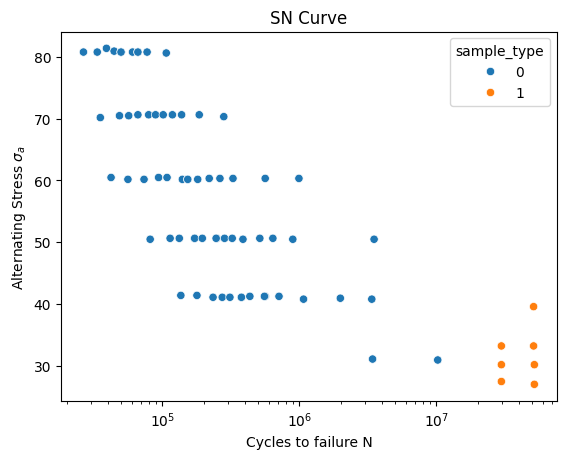

In [63]:
#plt.scatter(df['x'].to_numpy(), df['y'].to_numpy())
sns.scatterplot(data=df, x='x', y='y', hue='sample_type')
plt.xlabel("Cycles to failure N")
plt.ylabel("Alternating Stress $\sigma_a$")
plt.title("SN Curve")
plt.xscale('log')

In [64]:
x = df[['x', 'y']].to_numpy()
y = df['sample_type'].to_numpy()

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .5, random_state=42)

In [66]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
knn.score(x_test, y_test)

1.0

In [69]:
knn.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
cm = confusion_matrix(y_test, knn.predict(x_test))

Text(20.72222222222222, 0.5, 'Actual')

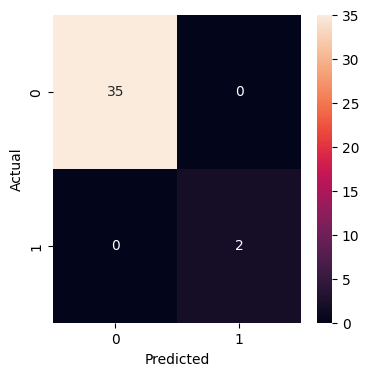

In [73]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")